# Content Filtering

In [141]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import seaborn as sns

df_articles = pd.read_csv("./CVS/shared_articles.csv")
df_users = pd.read_csv("./CVS/users_interactions.csv")


In [142]:
display(df_articles)
display(df_users)

,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
0,1459192779,CONTENT REMOVED,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,CONTENT SHARED,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,CONTENT SHARED,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117,1487946604,CONTENT SHARED,9213260650272029784,3609194402293569455,7144190892417579456,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,SP,BR,HTML,https://startupi.com.br/2017/02/liga-ventures-...,"Conheça a Liga IoT, plataforma de inovação abe...","A Liga Ventures, aceleradora de startups espec...",pt
3118,1487947067,CONTENT SHARED,-3295913657316686039,6960073744377754728,-8193630595542572738,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_3...,GA,US,HTML,https://thenextweb.com/apps/2017/02/14/amazon-...,Amazon takes on Skype and GoToMeeting with its...,"Amazon has launched Chime, a video conferencin...",en
3119,1488223224,CONTENT SHARED,3618271604906293310,1908339160857512799,-183341653743161643,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_0...,SP,BR,HTML,https://code.org/about/2016,Code.org 2016 Annual Report,"February 9, 2017 - We begin each year with a l...",en
3120,1488300719,CONTENT SHARED,6607431762270322325,-1393866732742189886,2367029511384577082,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,MG,BR,HTML,https://www.bloomberg.com/news/articles/2017-0...,JPMorgan Software Does in Seconds What Took La...,"At JPMorgan Chase & Co., a learning machine is...",en


,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
72307,1485190425,LIKE,-6590819806697898649,-9016528795238256703,8614469745607949425,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4...,MG,BR
72308,1485190425,VIEW,-5813211845057621660,102305705598210278,5527770709392883642,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,SP,BR
72309,1485190072,VIEW,-1999468346928419252,-9196668942822132778,-8300596454915870873,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,SP,BR
72310,1485190434,VIEW,-6590819806697898649,-9016528795238256703,8614469745607949425,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4...,MG,BR


In [143]:
# Rich implicit feedback: Different interaction types were logged, making it possible to infer the user's level of interest 
# in the articles (eg. comments > likes > views). The column eventType contains the "rating" or indication of user preference 
# for an article. This data is text-based, but ordinal, meaning there is an order of preference for each type of interation. 
# You can relabel this data to be numeric so that it will work as a rating column. In particular:
# VIEW: The user has opened the article. This is the most basic level of interest (set as 1)
df_users.loc[(df_users['eventType'] == 'VIEW'), 'eventType'] = 1

# LIKE: The user has liked the article. This is better than viewing (set as 2)
df_users.loc[(df_users['eventType'] == 'LIKE'), 'eventType'] = 2

# FOLLOW: The user chose to be notified on any new comment in the article. (Set as 3)
df_users.loc[(df_users['eventType'] == 'FOLLOW'), 'eventType'] = 3

# BOOKMARK: The user has bookmarked the article for easy return in the future. (Set as 4)
df_users.loc[(df_users['eventType'] == 'BOOKMARK'), 'eventType'] = 4

# COMMENT CREATED: The user wrote a comment for the article. This is the top interaction indicating the highest interest (set as 5)
df_users.loc[(df_users['eventType'] == 'COMMENT CREATED'), 'eventType'] = 5

df_users['eventType'].unique()
df_users.head(20)
# Assuming your tables are df_articles (with article/author info) and df_users (with user interaction data)
df = pd.merge(
    df_users,
    df_articles,
    on='contentId',
    how='inner'
)

<Axes: xlabel='eventType', ylabel='Count'>

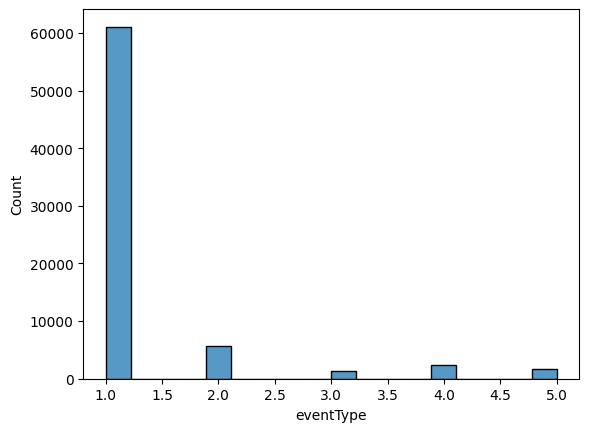

In [144]:
sns.histplot(data=df_users, x='eventType')

In [145]:
df_articles.fillna('unkown', inplace=True) #fill the missing values with unknown
df_users.fillna('unkown', inplace=True) #fill the missing values with unknown
df.fillna('unkown', inplace=True)

# print(df_articles.isna().sum())
# print(df_articles.shape)
# print(df_users.isna().sum())
# print(df_users.shape)
print(df_articles.isna().sum())

timestamp          0
eventType          0
contentId          0
authorPersonId     0
authorSessionId    0
authorUserAgent    0
authorRegion       0
authorCountry      0
contentType        0
url                0
title              0
text               0
lang               0
dtype: int64


/var/folders/r4/kgtsdn3109v2slyc0gqzwsbc0000gn/T/ipykernel_14508/307697669.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_users.fillna('unkown', inplace=True) #fill the missing values with unknown
/var/folders/r4/kgtsdn3109v2slyc0gqzwsbc0000gn/T/ipykernel_14508/307697669.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna('unkown', inplace=True)


In [146]:
# Create a TfidfVectorizer and Remove stopwords
tfidf = TfidfVectorizer(stop_words='english')

# Fit and transform the data to a tfidf matrix
tfidf_matrix = tfidf.fit_transform(df_articles['text'])

# Print the shape of the tfidf_matrix
print(tfidf_matrix.shape)

# Preview the matrix by placing it into a DataFrame (which we won't need later)
df_tfidf = pd.DataFrame(tfidf_matrix.T.todense(), index=tfidf.get_feature_names_out(), columns=df_articles['text'])
# df_tfidf.iloc[2221:2226]

(3122, 72353)


In [147]:
# Compute the cosine similarity between each movie description
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# For easier viewing, put it in a dataframe
pd.DataFrame(cosine_sim)

,0,1,2,3,4,5,6,7,8,9,...,3112,3113,3114,3115,3116,3117,3118,3119,3120,3121
0,1.000000,1.000000,0.029999,0.016192,0.234378,0.102207,0.186021,0.150986,0.182221,0.865994,...,0.043244,0.024061,0.007743,0.023067,0.011399,0.003296,0.021317,0.051052,0.090121,0.020183
1,1.000000,1.000000,0.029999,0.016192,0.234378,0.102207,0.186021,0.150986,0.182221,0.865994,...,0.043244,0.024061,0.007743,0.023067,0.011399,0.003296,0.021317,0.051052,0.090121,0.020183
2,0.029999,0.029999,1.000000,0.023368,0.032324,0.023549,0.041352,0.033399,0.042882,0.031538,...,0.019542,0.006460,0.006152,0.015815,0.003797,0.000000,0.010076,0.026958,0.033152,0.011318
3,0.016192,0.016192,0.023368,1.000000,0.018691,0.031610,0.007079,0.013496,0.023717,0.015807,...,0.050553,0.018448,0.007774,0.035578,0.024903,0.000000,0.077019,0.022694,0.045090,0.000000
4,0.234378,0.234378,0.032324,0.018691,1.000000,0.214121,0.159303,0.231415,0.143972,0.186033,...,0.038043,0.022978,0.009663,0.050044,0.024246,0.013207,0.020210,0.026150,0.094685,0.011511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117,0.003296,0.003296,0.000000,0.000000,0.013207,0.000000,0.012865,0.000000,0.002807,0.002543,...,0.000000,0.006506,0.000000,0.000000,0.000000,1.000000,0.000000,0.000125,0.012346,0.000000
3118,0.021317,0.021317,0.010076,0.077019,0.020210,0.034869,0.011329,0.018790,0.032870,0.015953,...,0.074052,0.049896,0.008562,0.034565,0.023315,0.000000,1.000000,0.029901,0.039184,0.008100
3119,0.051052,0.051052,0.026958,0.022694,0.026150,0.044007,0.017267,0.025773,0.019949,0.042678,...,0.041965,0.019718,0.026403,0.024435,0.027546,0.000125,0.029901,1.000000,0.059641,0.079239
3120,0.090121,0.090121,0.033152,0.045090,0.094685,0.085629,0.097001,0.108222,0.041199,0.077155,...,0.058456,0.039525,0.015009,0.028548,0.024956,0.012346,0.039184,0.059641,1.000000,0.043186


In [148]:
df_sorted = pd.DataFrame(cosine_sim).sort_values(by=[0], ascending=False)

for id in df_sorted.index[0:11]:
    print(id, '\t', df.loc[id, 'title'])

display(df_sorted)

0 	 Hiri wants to fix the workplace email problem
1 	 Top 10 Intranet Trends of 2016
9 	 Google, Amazon and the upcoming battle over AI Assistants
525 	 Effective learning through code workshops | Box Blog
184 	 Hero unveils a new home gadget to help you track and dispense pills
83 	 Bot Engine
112 	 Google cloud to OpenStack users: Come on in!
187 	 Better together: New Microsoft integrations for easier collaboration
115 	 U.S. State Department Recommends Development of Blockchain and Distributed Ledgers to International Partners
131 	 Here's proof that Google is getting serious about battling Facebook in a key area
2378 	 If women in tech stop apologizing, we might just be able to shut the sexist shit down. - Athena Talks


,0,1,2,3,4,5,6,7,8,9,...,3112,3113,3114,3115,3116,3117,3118,3119,3120,3121
0,1.000000,1.000000,0.029999,0.016192,0.234378,0.102207,0.186021,0.150986,0.182221,0.865994,...,0.043244,0.024061,0.007743,0.023067,0.011399,0.003296,0.021317,0.051052,0.090121,0.020183
1,1.000000,1.000000,0.029999,0.016192,0.234378,0.102207,0.186021,0.150986,0.182221,0.865994,...,0.043244,0.024061,0.007743,0.023067,0.011399,0.003296,0.021317,0.051052,0.090121,0.020183
9,0.865994,0.865994,0.031538,0.015807,0.186033,0.066957,0.145716,0.119134,0.149767,1.000000,...,0.035278,0.017967,0.007885,0.015118,0.013960,0.002543,0.015953,0.042678,0.077155,0.014824
525,0.573491,0.573491,0.025405,0.012065,0.246473,0.124257,0.176664,0.145108,0.176852,0.575536,...,0.048840,0.018346,0.015196,0.019146,0.011161,0.039552,0.014295,0.021376,0.115521,0.018514
184,0.561477,0.561477,0.026309,0.014411,0.260029,0.107196,0.254204,0.177274,0.241549,0.542963,...,0.031366,0.019723,0.003328,0.015546,0.012231,0.000914,0.018423,0.014359,0.039569,0.003485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368,0.000000,0.000000,0.003515,0.000000,0.001046,0.000000,0.002118,0.000000,0.002559,0.000000,...,0.000000,0.006711,0.000000,0.000861,0.000000,0.138418,0.000000,0.003298,0.000909,0.004019
1814,0.000000,0.000000,0.000000,0.000000,0.000281,0.000000,0.001992,0.000000,0.000445,0.000000,...,0.001519,0.000584,0.000000,0.000762,0.001337,0.079232,0.000913,0.000143,0.000427,0.000000
1815,0.000000,0.000000,0.001065,0.034515,0.001317,0.000000,0.001166,0.000000,0.005037,0.000000,...,0.004029,0.008507,0.074037,0.000000,0.000000,0.121568,0.000000,0.003384,0.001404,0.003532
449,0.000000,0.000000,0.013042,0.006596,0.001987,0.001982,0.003672,0.000000,0.003802,0.000000,...,0.091421,0.008303,0.000000,0.000726,0.001343,0.190069,0.010380,0.001703,0.018219,0.000000


In [149]:
def get_recommendations(item_id, sim_matrix, n=10, messages=True):
  if item_id > sim_matrix.shape[0]:  # Add some error checking for robustness
    print(f"Item {item_id} is not in the similarity matrix you provided")
    return

  # Get the pairwise similarity scores of all movies with that movie
  sim_scores = list(enumerate(sim_matrix[item_id]))

  # Sort the items based on the similarity scores
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

  # Get the scores of the n most similar items; start at 1 so that it skips itself
  top_similar = sim_scores[1:n+1]

  # Put the recommended item indices and similarity scores together in a dictionary using comprehension
  rec_dict = {i[0]:i[1] for i in top_similar}

  if messages:
    print(f"The top recommended item IDs are: {list(rec_dict.keys())}")
    print(f"Their similarity scores are:\t  {list(rec_dict.values())}")

  # Return the top n most similar items
  return rec_dict

In [150]:
df.head()

,timestamp_x,eventType_x,contentId,personId,sessionId,userAgent,userRegion,userCountry,timestamp_y,eventType_y,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
0,1465413032,1,-3499919498720038879,-8845298781299428018,1264196770339959068,unkown,unkown,unkown,1465309434,CONTENT SHARED,-1032019229384696495,-7696592431575292648,unkown,unkown,unkown,HTML,http://techcrunch.com/2016/06/07/hiri/,Hiri wants to fix the workplace email problem,Hiri is the latest startup trying to fix email...,en
1,1465412560,1,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US,1465223368,CONTENT SHARED,1895326251577378793,-1847389231177111235,unkown,unkown,unkown,HTML,https://www.nngroup.com/articles/top-intranet-...,Top 10 Intranet Trends of 2016,"Summary: Hero images, carousels, fat footers, ...",en
2,1465416190,1,310515487419366995,-1130272294246983140,2631864456530402479,unkown,unkown,unkown,1465396491,CONTENT SHARED,-5527145562136413747,3192880191028684629,unkown,unkown,unkown,HTML,http://blog.runrun.it/erros-de-portugues-em-e-...,71 erros de português que precisam sumir dos s...,Escrever um e-mail não deveria ser uma coisa t...,pt
3,1465413895,3,310515487419366995,344280948527967603,-3167637573980064150,unkown,unkown,unkown,1465396491,CONTENT SHARED,-5527145562136413747,3192880191028684629,unkown,unkown,unkown,HTML,http://blog.runrun.it/erros-de-portugues-em-e-...,71 erros de português que precisam sumir dos s...,Escrever um e-mail não deveria ser uma coisa t...,pt
4,1465412290,1,-7820640624231356730,-445337111692715325,5611481178424124714,unkown,unkown,unkown,1465411724,CONTENT SHARED,-1032019229384696495,3621737643587579081,unkown,unkown,unkown,HTML,http://www.fastcompany.com/3058876/your-most-p...,How This Googler Redesigned The Workweek,Jake Knapp has always been concerned about the...,en


In [151]:
# Change this value to any title you'd like to get recommendations
title = "Torus"

# Check if the title is valid; if not, suggest alternatives and use the last one for recommendations
if title in df['title'].to_list():
  id = df.index[df['title']==title][0] # Convert the title to an index (i.e. item ID)
  print(id)
else:
  print(f"\"{title}\" is not in the data set. Try one of these:\n")
  for row in df.sample(n=10).itertuples():  # Get a random 10 titles
    id = row[0]
    title = row.title
    print(f'\t{title}')

print(f"\nIf you like \"{title},\" then you may also like:\n")

# Call the function and return the dictionary; print out the dictionary if you want to see what it is
recommend_dict = get_recommendations(id, cosine_sim, n=10, messages=False)

# Add the dictionary to a new DataFrame; this isn't necessary, but it helps to see what movies are recommended
df_similarity = pd.DataFrame(data=recommend_dict.values(), columns=['similarity'], index=recommend_dict.keys())

# Create a subset of the original df DataFrame with only the recommended movies
df_recommendations = df.loc[df.index.isin(recommend_dict.keys()), ['title']]

# Join the original df results with the recommended movie similarity scores so that we can sort the list and view it
df_recommendations.join(df_similarity).sort_values(by=['similarity'], ascending=False)

21

If you like "Torus," then you may also like:



,title,similarity
1843,Bots won't replace apps. Better apps will repl...,0.333194
2763,How Companies Are Using Machine Learning to Ge...,0.329047
1807,"What's new in Android: the N-Release, Virtual ...",0.323593
1191,How to Create a Unified Culture in a Company W...,0.322281
1157,JavaServer Faces 2.3 Quick Reference - DZone Java,0.320468
1203,"The New App Store: Subscription Pricing, Faste...",0.320452
1204,Digital is all about the people - Chris Skinne...,0.320452
2571,If you think women in tech is just a pipeline ...,0.319357
3071,"Inovador, Nubank ganha prêmio no Vale do Silíc...",0.315393
3016,The Continuous Delivery Maturity Model,0.314273


# Collaborative Filtering

In [152]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

df_article = pd.read_csv('CVS/shared_articles.csv')
df_user = pd.read_csv('CVS/users_interactions.csv')
df_article.head()

,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
0,1459192779,CONTENT REMOVED,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,CONTENT SHARED,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,CONTENT SHARED,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en


In [153]:
df_user.head()

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,NaN,NaN,NaN


In [154]:
df_triple = pd.merge(df_article, df_user, on='contentId', how='inner')
df_triple.head()

,timestamp_x,eventType_x,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang,timestamp_y,eventType_y,personId,sessionId,userAgent,userRegion,userCountry
0,1459192779,CONTENT REMOVED,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en,1459192561,VIEW,4340306774493623681,8940341205206233829,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_5...,SP,BR
1,1459192779,CONTENT REMOVED,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en,1459192667,VIEW,4340306774493623681,8940341205206233829,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_5...,SP,BR
2,1459192779,CONTENT REMOVED,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en,1459164960,VIEW,-1578287561410088674,2811329017818501696,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4...,SP,BR
3,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en,1459270471,VIEW,2873028073541627603,-3228450896145227905,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,SP,BR
4,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en,1459539433,VIEW,8414731042150985013,4543899740167763020,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4...,MG,BR


<Axes: xlabel='eventType_y', ylabel='Count'>

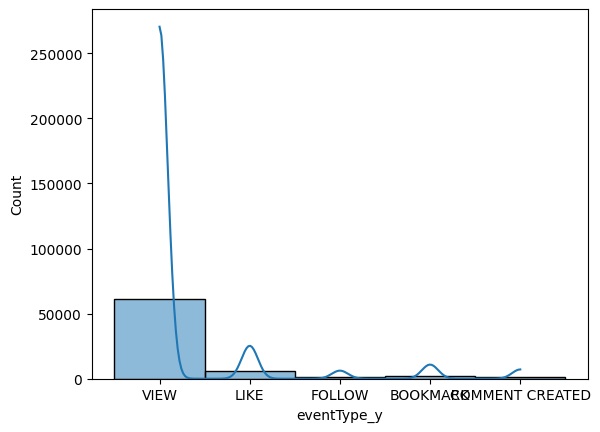

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df_triple, x='eventType_y', kde=True)

In [156]:
n_posts = len(df_triple)
n_type = len(df_triple['eventType_y'].unique())
n_users = len(df_triple['authorPersonId'].unique())

print(f"Number of posts: {n_posts}")
print(f"Number of unique types: {n_type}")
print(f"Number of unique users: {n_users}")
print(f"Average post interaction per user: {round(n_posts/n_users, 2)}")
print(f"Average posts per type: {round(n_posts/n_type, 2)}")

Number of posts: 72680
Number of unique types: 5
Number of unique users: 252
Average post interaction per user: 288.41
Average posts per type: 14536.0


In [157]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import pickle

# Load the dataset
file_path = 'CVS/users_interactions.csv'  # Update with your actual file path
df = pd.read_csv(file_path)

# Map event types to numeric ratings
event_type_mapping = {
    "VIEW": 1,
    "LIKE": 2,
    "FOLLOW": 3,
    "BOOKMARK": 4,
    "COMMENT CREATED": 5
}
df['rating'] = df['eventType'].map(event_type_mapping)

# Create a user-item interaction matrix
interaction_matrix = df.pivot_table(index='personId', columns='contentId', values='rating', fill_value=0)
print(f"Interaction matrix created with shape: {interaction_matrix.shape}")

# Fit the NearestNeighbors model
model = NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(interaction_matrix)
print("NearestNeighbors model trained successfully.")

# Save the trained model and interaction matrix
model_file = './CVS/recommender_model.sav'
with open(model_file, 'wb') as f:
    pickle.dump({'model': model, 'interaction_matrix': interaction_matrix}, f)

print(f"Model and interaction matrix saved to {model_file}")

Interaction matrix created with shape: (1895, 2987)
NearestNeighbors model trained successfully.
Model and interaction matrix saved to ./CVS/recommender_model.sav


In [158]:
# import numpy as np

# # Load the saved model and interaction matrix
# model_file = './CVS/recommender_model.sav'
# with open(model_file, 'rb') as f:
#     saved_data = pickle.load(f)

# model = saved_data['model']
# interaction_matrix = saved_data['interaction_matrix']

# # Select a sample user (e.g., the first user in the interaction matrix)
# sample_user_index = 0  # Change this to test with different users
# sample_user_vector = interaction_matrix.iloc[sample_user_index].values.reshape(1, -1)

# # Find the 5 nearest neighbors (most similar users)
# distances, indices = model.kneighbors(sample_user_vector, n_neighbors=5)

# # Print the results
# print(f"Sample user index: {sample_user_index}")
# print("Nearest neighbors (user indices):", indices.flatten())
# print("Distances to nearest neighbors:", distances.flatten())

# # Optionally, map the indices back to user IDs
# user_ids = interaction_matrix.index
# nearest_user_ids = user_ids[indices.flatten()]
# print("Nearest neighbors (user IDs):", nearest_user_ids.tolist())

# Save Filtering Models to Respective CSV's

## Collab Filter

In [159]:
# Get nearest neighbors for each user (excluding themselves)
distances, indices = model.kneighbors(interaction_matrix, n_neighbors=6)  # 1 self + 5 neighbors

# Create a DataFrame of neighbors
neighbors_df = pd.DataFrame(indices, index=interaction_matrix.index)
neighbors_df.columns = ['self'] + [f'neighbor_{i}' for i in range(1, 6)]

neighbors_df.to_csv('./CVS/collaborative_filtering.csv')
print("User nearest neighbors saved to CSV.")

User nearest neighbors saved to CSV.


## Content Filter

In [161]:
import pandas as pd
from tqdm import tqdm  # Optional: for a progress bar

# Create an empty list to hold each row of recommendations
recommendation_rows = []

# Loop through every ID in the dataset
for item_id in tqdm(range(len(cosine_sim)), desc="Generating recommendations"):
    recommend_dict = get_recommendations(item_id, cosine_sim, n=10, messages=False)
    recommended_ids = list(recommend_dict.keys())
    recommendation_rows.append([item_id] + recommended_ids)

# Create a DataFrame where the first column is the original item ID and the next 10 columns are recommendations
columns = ['item_id'] + [f'rec_{i+1}' for i in range(10)]
recommendations_df = pd.DataFrame(recommendation_rows, columns=columns)

# Optional: merge titles if you want to include them
# recommendations_df = recommendations_df.merge(df[['title']], left_on='item_id', right_index=True)

# Save the recommendations to a CSV
recommendations_df.to_csv("./CVS/content_filtering.csv", index=False)

print("CSV saved as 'content_filtering.csv'")

Generating recommendations: 100%|██████████| 3122/3122 [00:02<00:00, 1169.00it/s]

CSV saved as 'content_filtering.csv'
